In [1]:
from pylab import *
from visualize_percolation_cluster import visualize_percolation_cluster as P
from visualize_percolation_cluster import Percolation_Cluster

%load_ext autoreload
%autoreload 2

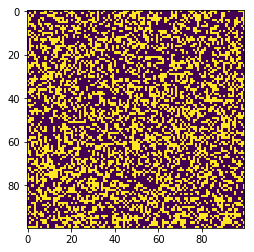

In [2]:
L = 100
p = 0.4
P(p, L)

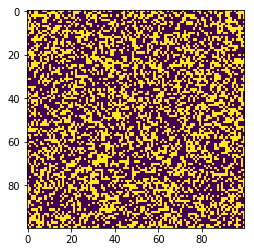

In [5]:
pc = Percolation_Cluster(p, L)
pc.visualize()
lw, num = pc.get_labels()

In [6]:
num

1106

In [7]:
lw[:10, :10]

array([[  0,   1,   0,   2,   2,   0,   0,   3,   3,   0],
       [  0,   1,   0,   2,   2,   0,   0,   0,   0,   4],
       [ 37,   0,   2,   2,   2,   2,   2,   2,   2,   0],
       [ 37,  37,   0,   2,   0,   0,   0,   0,   2,   2],
       [  0,  37,   0,   0,   0,   0,   0,   2,   2,   0],
       [ 37,  37,   0,  67,   0,   0,   0,   2,   2,   0],
       [ 37,   0,  37,   0,  80,  80,   0,   0,   0,   0],
       [ 37,   0,  37,  37,   0,  80,   0,  89,  89,  89],
       [ 37,  37,  37,   0, 103,   0,   0,   0,   0,  89],
       [  0,   0,  37,   0,   0, 116,   0, 117, 117,   0]], dtype=int32)